# Import libraries and data


In [12]:
!pip install tbats

In [13]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python


In [14]:
#import libraries
import pandas as pd
import numpy as np

In [15]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

instant  season  yr  mnth  ...  windspeed  casual  registered  cnt
dteday                                 ...                                    
2011-01-01        1       1   0     1  ...   0.160446     331         654  985

[1 rows x 15 columns]

In [16]:
#select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)                       

cnt  holiday  workingday  ...     atemp       hum  windspeed
dteday                                ...                               
2011-01-01  985        0           0  ...  0.363625  0.805833   0.160446

[1 rows x 8 columns]

#Data Transformation

In [17]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

y  holiday  workingday  ...     atemp       hum  windspeed
dteday                                ...                               
2011-01-01  985        0           0  ...  0.363625  0.805833   0.160446

[1 rows x 8 columns]

In [18]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

#Visualization

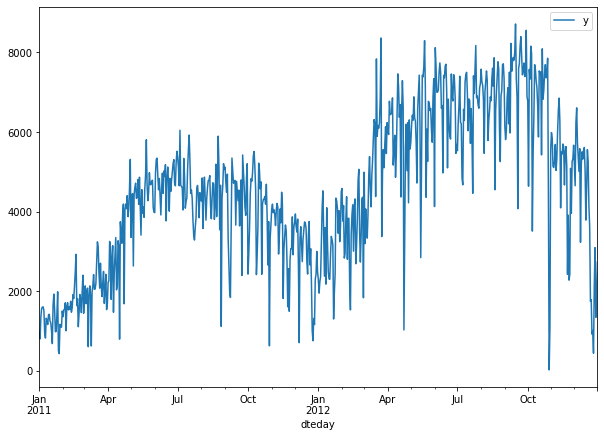

In [ ]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

#Training and Test Set

In [19]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

y  holiday  workingday  ...     atemp     hum  windspeed
dteday                                 ...                             
2012-12-31  2729        0           1  ...  0.223487  0.5775   0.154846

[1 rows x 8 columns]

#TBATS Model

In [20]:
#libraries
from tbats import TBATS

In [24]:
#tbats model
model = TBATS(seasonal_periods = [7, 365.5])
model = model.fit(training_set['y'])

In [25]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

dteday
2012-12-01    4880.266918
2012-12-02    4484.716446
2012-12-03    4434.522393
2012-12-04    4513.434005
2012-12-05    4650.709385
Freq: D, Name: TBATS, dtype: float64

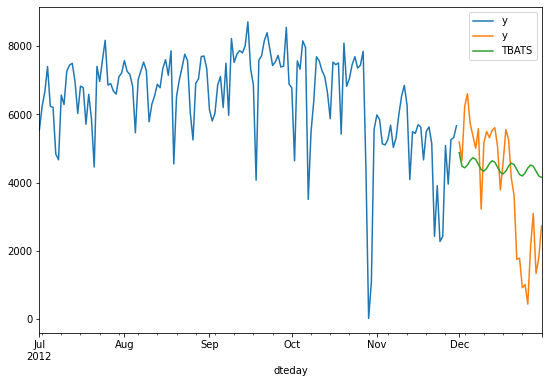

In [26]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_tbats.plot(legend = True)

#Model assessment

In [27]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tbats)), 0))

1426.0
1748.0


In [ ]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tbats)

68.06406403722941

#export forecasts

In [ ]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [ ]:
predictions_tbats.to_csv('predictions_tbats.csv', index = True)